## Importing the Library

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model 
import matplotlib.pyplot as plt
from scipy.stats import skew
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model as lm
import sklearn.metrics as metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import RandomForestRegressor

## Importing the library

In [2]:
city=pd.read_csv("Tetuan_City_power_consumption.csv")
city.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


## Shape

In [3]:
city.shape

(52416, 9)

## Checking the features

In [5]:
city.columns

Index(['DateTime', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption'],
      dtype='object')

## City Info

In [6]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DateTime                   52416 non-null  object 
 1   Temperature                52416 non-null  float64
 2   Humidity                   52416 non-null  float64
 3   Wind Speed                 52416 non-null  float64
 4   general diffuse flows      52416 non-null  float64
 5   diffuse flows              52416 non-null  float64
 6   Zone 1 Power Consumption   52416 non-null  float64
 7   Zone 2  Power Consumption  52416 non-null  float64
 8   Zone 3  Power Consumption  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


## Checking for basic statistics in the dataset

In [7]:
city.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


## Checking for NULL values

In [8]:
city.isnull().sum()

DateTime                     0
Temperature                  0
Humidity                     0
Wind Speed                   0
general diffuse flows        0
diffuse flows                0
Zone 1 Power Consumption     0
Zone 2  Power Consumption    0
Zone 3  Power Consumption    0
dtype: int64

## Checking for NA values

In [4]:
print(city.isna().sum())

DateTime                     0
Temperature                  0
Humidity                     0
Wind Speed                   0
general diffuse flows        0
diffuse flows                0
Zone 1 Power Consumption     0
Zone 2  Power Consumption    0
Zone 3  Power Consumption    0
dtype: int64


## Applying transformations on the datetime columns

In [9]:
city['DateTime'] = pd.to_datetime(city['DateTime'])

# Extract different components into separate columns
city['date'] = city['DateTime'].dt.date
city['hour'] = city['DateTime'].dt.hour
city['minute'] = city['DateTime'].dt.minute
city['month'] = city['DateTime'].dt.month
#city['weekday'] = city['DateTime'].dt.day_name()
city['day_of_month'] = city['DateTime'].dt.day

city.head()
city.columns

Index(['DateTime', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption', 'date',
       'hour', 'minute', 'month', 'day_of_month'],
      dtype='object')

## Converting weekdat into numbers

In [10]:
import pandas as pd

# Assuming you have a DataFrame called 'city' with a column 'DateTime'
# Convert the 'DateTime' column to datetime format
city['DateTime'] = pd.to_datetime(city['DateTime'])

# Extract weekday names
city['weekday'] = city['DateTime'].dt.day_name()

# Define a mapping from weekday names to numbers
weekday_to_number = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

# Map weekday names to numbers
city['weekday_number'] = city['weekday'].map(weekday_to_number)

# Now 'weekday_number' column will contain the weekday numbers
print(city)


                 DateTime  Temperature  Humidity  Wind Speed  \
0     2017-01-01 00:00:00        6.559      73.8       0.083   
1     2017-01-01 00:10:00        6.414      74.5       0.083   
2     2017-01-01 00:20:00        6.313      74.5       0.080   
3     2017-01-01 00:30:00        6.121      75.0       0.083   
4     2017-01-01 00:40:00        5.921      75.7       0.081   
...                   ...          ...       ...         ...   
52411 2017-12-30 23:10:00        7.010      72.4       0.080   
52412 2017-12-30 23:20:00        6.947      72.6       0.082   
52413 2017-12-30 23:30:00        6.900      72.8       0.086   
52414 2017-12-30 23:40:00        6.758      73.0       0.080   
52415 2017-12-30 23:50:00        6.580      74.1       0.081   

       general diffuse flows  diffuse flows  Zone 1 Power Consumption  \
0                      0.051          0.119               34055.69620   
1                      0.070          0.085               29814.68354   
2           

## Renaming the columns

In [12]:
city.rename(columns={'Zone 1 Power Consumption': 'Quads',
                   'Zone 2  Power Consumption': 'Smir',
                   'Zone 3  Power Consumption': 'Boussafou'},
          inplace=True)

In [13]:
city.columns

Index(['DateTime', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Quads', 'Smir', 'Boussafou',
       'date', 'hour', 'minute', 'month', 'day_of_month', 'weekday',
       'weekday_number'],
      dtype='object')

## comparing the power consumptions for the zones

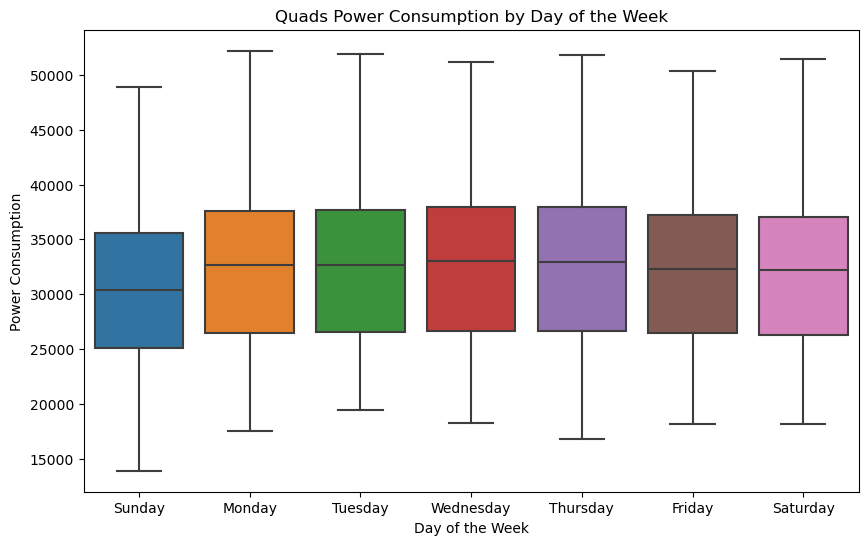

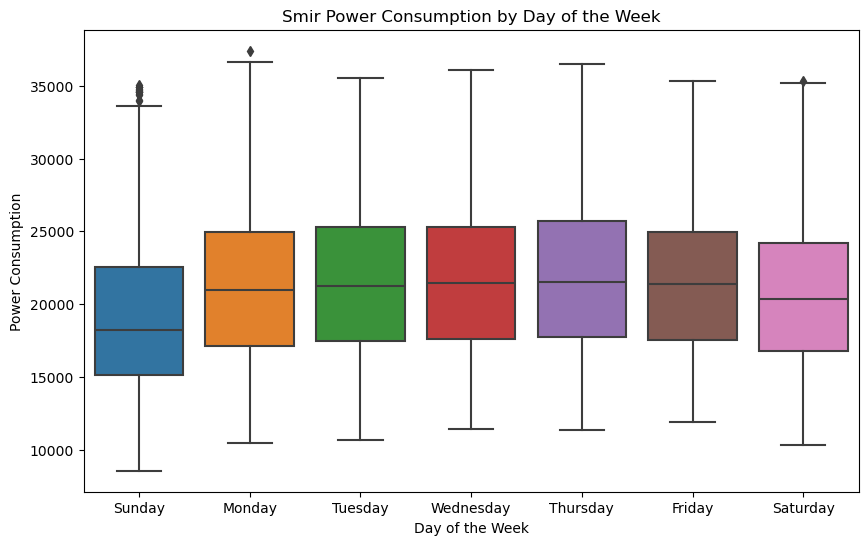

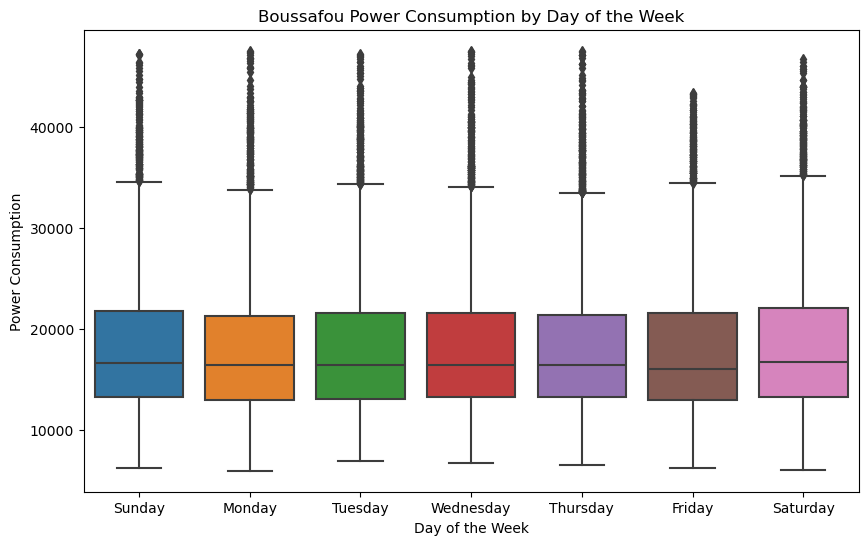

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns of interest
columns_of_interest = ['Quads', 'Smir', 'Boussafou', 'weekday']

# Create a new DataFrame with the selected columns
city_selected = city[columns_of_interest]

# Plot box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=city_selected, x='weekday', y='Quads')
plt.title('Quads Power Consumption by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Power Consumption')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=city_selected, x='weekday', y='Smir')
plt.title('Smir Power Consumption by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Power Consumption')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=city_selected, x='weekday', y='Boussafou')
plt.title('Boussafou Power Consumption by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Power Consumption')
plt.show()


## Checking the distribution of the Quads power consumption

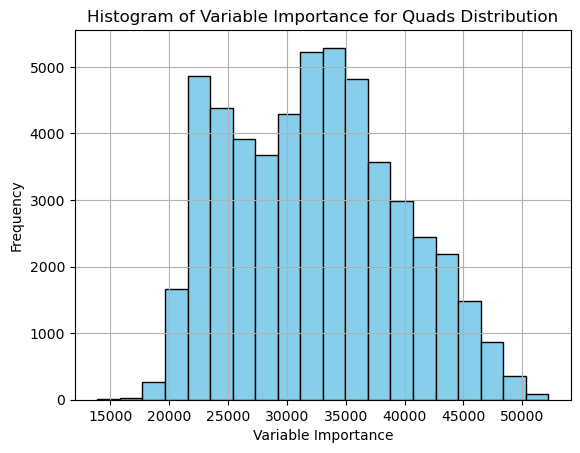

In [15]:
# Assuming your dataframe is named 'city' and the column is named 'quads'
variable_importance_quads = city['Quads']

# Plotting the histogram
plt.hist(variable_importance_quads, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Variable Importance')
plt.ylabel('Frequency')
plt.title('Histogram of Variable Importance for Quads Distribution')
plt.grid(True)
plt.show()

## dropping unnecessary columns

In [17]:
city=city.drop(["DateTime","date","weekday"],axis=1)


In [18]:
city.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Quads,Smir,Boussafou,hour,minute,month,day_of_month,weekday_number
0,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,0,0,1,1,6
1,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,0,10,1,1,6
2,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,0,20,1,1,6
3,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,0,30,1,1,6
4,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,0,40,1,1,6


## checking the correlation of features

In [19]:
city.corr()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Quads,Smir,Boussafou,hour,minute,month,day_of_month,weekday_number
Temperature,1.000000,-0.460243,0.477109,0.460294,0.196522,0.440221,0.382428,0.489527,1.971305e-01,-6.724601e-05,2.843350e-01,1.926774e-02,-1.370995e-02
Humidity,-0.460243,1.000000,-0.135853,-0.468138,-0.256886,-0.287421,-0.294961,-0.233022,-2.426916e-01,4.929864e-04,-1.741931e-02,-4.540307e-02,-1.711388e-02
Wind Speed,0.477109,-0.135853,1.000000,0.133733,-0.000972,0.167444,0.146413,0.278641,4.148645e-03,-3.136897e-04,1.683554e-01,1.640667e-01,3.211641e-02
general diffuse flows,0.460294,-0.468138,0.133733,1.000000,0.564718,0.187965,0.157223,0.063376,1.299766e-01,-1.913001e-04,-2.055450e-02,3.225334e-02,9.666328e-03
diffuse flows,0.196522,-0.256886,-0.000972,0.564718,1.000000,0.080274,0.044667,-0.038506,1.309090e-01,-1.828407e-03,-1.297793e-01,-2.827775e-02,-2.453960e-02
Quads,0.440221,-0.287421,0.167444,0.187965,0.080274,1.000000,0.834519,0.750733,7.279525e-01,3.426961e-04,-5.346049e-03,2.627309e-02,-6.970813e-02
Smir,0.382428,-0.294961,0.146413,0.157223,0.044667,0.834519,1.000000,0.570932,6.633590e-01,3.307693e-05,3.202665e-01,5.294130e-02,-1.226819e-01
Boussafou,0.489527,-0.233022,0.278641,0.063376,-0.038506,0.750733,0.570932,1.000000,4.542566e-01,3.886920e-05,-2.339260e-01,-4.782920e-03,5.294106e-03
hour,0.197130,-0.242692,0.004149,0.129977,0.130909,0.727953,0.663359,0.454257,1.000000e+00,1.912651e-17,-5.886319e-16,-1.024999e-16,-5.420622e-17
minute,-0.000067,0.000493,-0.000314,-0.000191,-0.001828,0.000343,0.000033,0.000039,1.912651e-17,1.000000e+00,7.656029e-15,5.190033e-16,2.017312e-17


## writing it to CSV to import the data and implement in R

In [20]:
import csv

def writing_to_csv():
 
    try:
        csv_file=open("Output CSV.csv","w")
        
    except FileNotFoundError:
        ##print if file not found
        print("please enter the correct file")
    except PermissionError:
        ##print if you dont have the exact permissions
        print("sorry you dont have the right permissions")
    except Exception as error:
        ##print any other array
        print("an error was raised\n",error)

city.to_csv("Output City.csv", sep=',', index=False)
writing_to_csv

<function __main__.writing_to_csv()>

# Random Forest Implementation for City dataset

explained_variance is  0.99
r2 is  0.9922
MAE is  412.3631
MSE is  395904.0575
RMSE is 629.2091


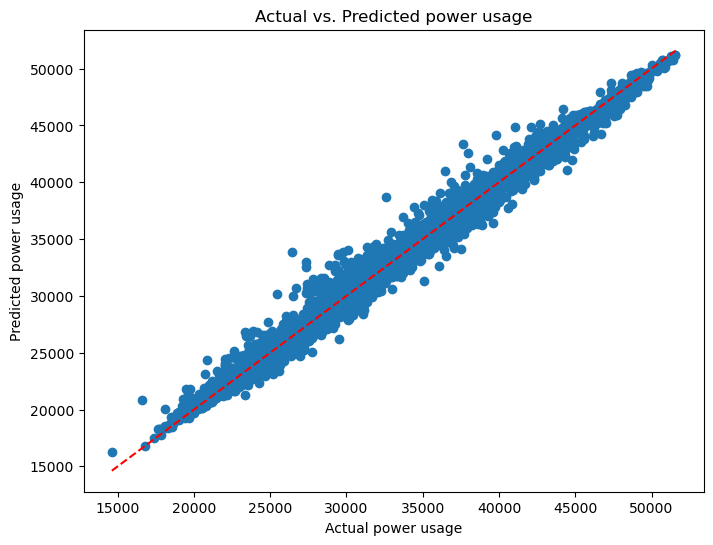

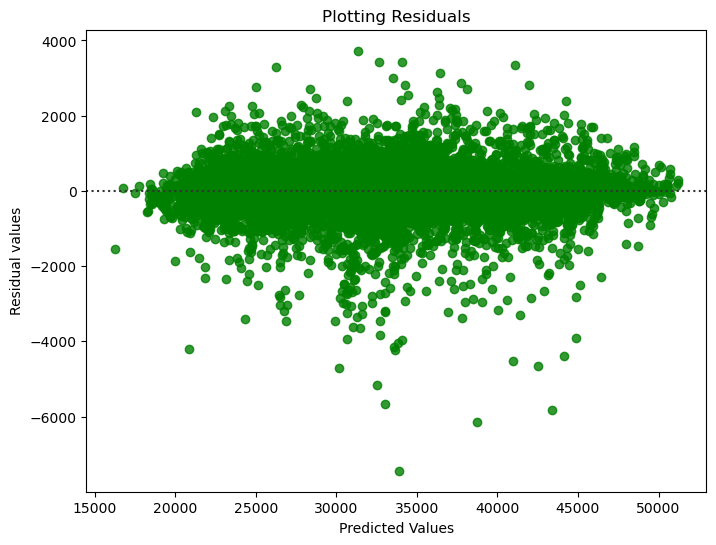

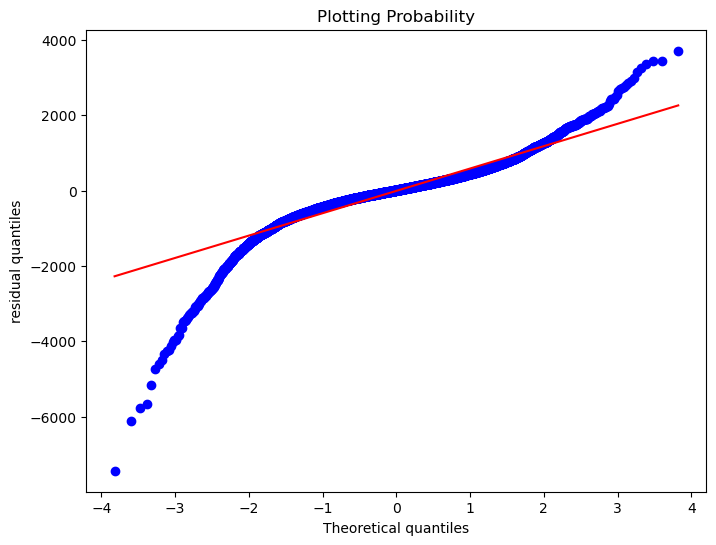

CPU times: total: 19.1 s
Wall time: 35 s


In [21]:
%%time

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Assaigning values for X and Y
X = city[['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 'diffuse flows', 'Smir', 'Boussafou', 'hour', 'minute', 'month', 'day_of_month', 'weekday_number']]
y = city['Quads']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor with specified parameters
rf_regressor = RandomForestRegressor(n_estimators=100, 
                                     max_features=7,
                                     max_depth=None,
                                     min_samples_split=2,
                                     min_samples_leaf=1)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make Predictions
y_pred = rf_regressor.predict(X_test)

def regression_results(y_1, y_predict):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_test, y_predict)
    mean_absolute_error=metrics.mean_absolute_error(y_test, y_predict) 
    mse=metrics.mean_squared_error(y_test, y_predict) 
    #mean_squared_log_error=metrics.mean_squared_log_error(y_test, predicted)
    median_absolute_error=metrics.median_absolute_error(y_test, y_predict)
    r2=metrics.r2_score(y_test, y_predict)

    print('explained_variance is ',round(explained_variance,2))    
    #print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2 is ', round(r2,4))
    print('MAE is ', round(mean_absolute_error,4))
    print('MSE is ', round(mse,4))
    print('RMSE is', round(np.sqrt(mse),4))
    

def predicted_plot(y_test, y_predict):
    plt.subplots(figsize=(8,6))
    plt.scatter(y_test, y_predict)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
    plt.xlabel("Actual power usage")
    plt.ylabel("Predicted power usage")
    plt.title("Actual vs. Predicted power usage")
    plt.show()
    
def residual_plot(y_test, y_predict):
    residual_value = y_test - y_predict
    plt.figure(figsize=(8,6))
    sns.residplot(x=y_predict, y=residual_value ,scatter_kws={"color": "green"})
    plt.title("Plotting Residuals")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residual values")
    plt.show()
    return residual_value

def probability_plot(residual):
    plt.subplots(figsize=(8,6))
    stats.probplot(residual, plot=plt)
    plt.title('Plotting Probability')
    plt.xlabel('Theoretical quantiles')
    plt.ylabel('residual quantiles')
   
    plt.show()

regression_results(y_test,y_pred)
predicted_plot(y_test,y_pred)
residual=residual_plot(y_test,y_pred)
probability_plot(residual)


# Gradient boosting Implementation for City dataset

explained_variance is  0.97
r2 is  0.9745
MAE is  786.6203
MSE is  1287473.3293
RMSE is 1134.6688


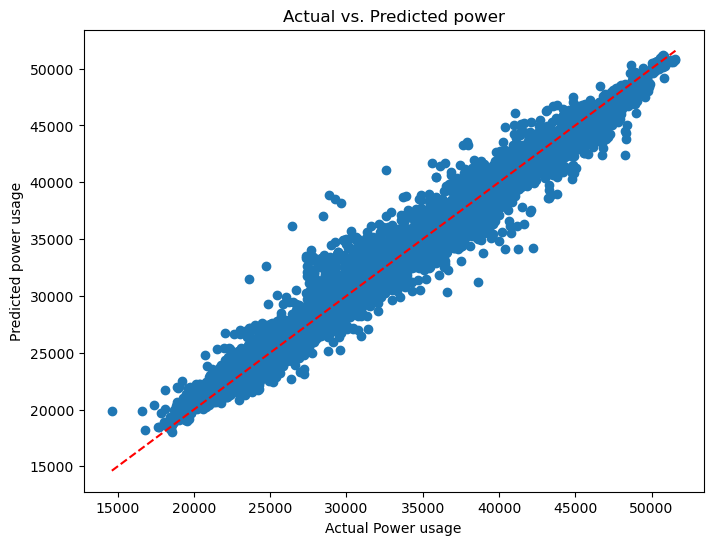

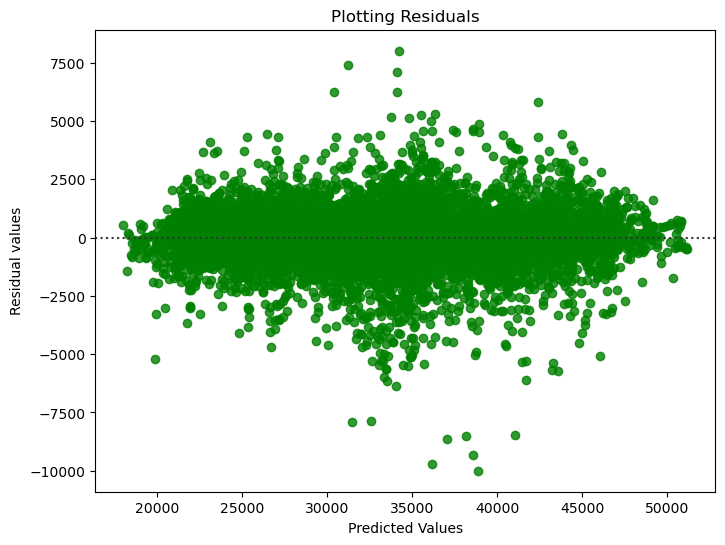

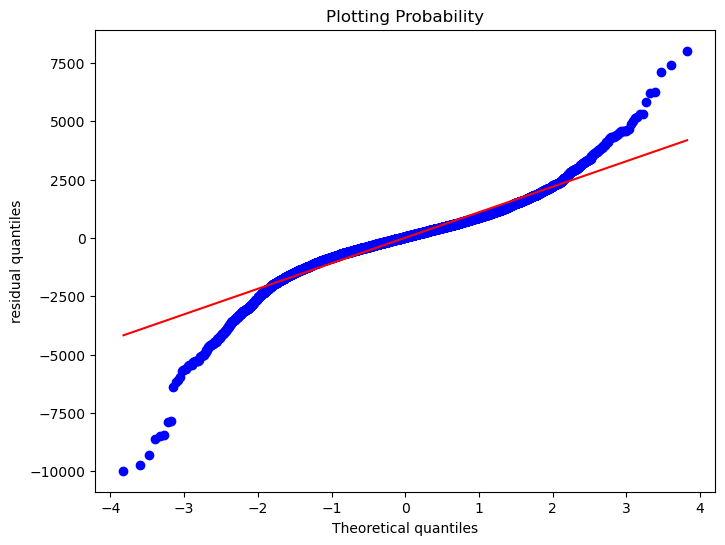

CPU times: total: 29.6 s
Wall time: 59.2 s


In [22]:
%%time
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd

# Assuming you have your DataFrame named 'city'
# Split data into features (X) and target (y)
X = city.drop(columns=['Quads'])
y = city['Quads']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the GBRT model
gbrt = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, max_depth=3, random_state=42)
gbrt.fit(X_train, y_train)

# Make predictions
y_pred = gbrt.predict(X_test)


def regression_results(y_1, y_predict):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_test, y_predict)
    mean_absolute_error=metrics.mean_absolute_error(y_test, y_predict) 
    mse=metrics.mean_squared_error(y_test, y_predict) 
    #mean_squared_log_error=metrics.mean_squared_log_error(y_test, predicted)
    median_absolute_error=metrics.median_absolute_error(y_test, y_predict)
    r2=metrics.r2_score(y_test, y_predict)

    print('explained_variance is ',round(explained_variance,2))    
    #print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2 is ', round(r2,4))
    print('MAE is ', round(mean_absolute_error,4))
    print('MSE is ', round(mse,4))
    print('RMSE is', round(np.sqrt(mse),4))
    

def predicted_plot(y_test, y_predict):
    plt.subplots(figsize=(8,6))
    plt.scatter(y_test, y_predict)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
    plt.xlabel("Actual Power usage")
    plt.ylabel("Predicted power usage")
    plt.title("Actual vs. Predicted power")
    plt.show()
    
def residual_plot(y_test, y_predict):
    residual_value = y_test - y_predict
    plt.figure(figsize=(8,6))
    sns.residplot(x=y_predict, y=residual_value ,scatter_kws={"color": "green"})
    plt.title("Plotting Residuals")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residual values")
    plt.show()
    return residual_value

def probability_plot(residual):
    plt.subplots(figsize=(8,6))
    stats.probplot(residual, plot=plt)
    plt.title('Plotting Probability')
    plt.xlabel('Theoretical quantiles')
    plt.ylabel('residual quantiles')
   
    plt.show()

regression_results(y_test,y_pred)
predicted_plot(y_test,y_pred)
residual=residual_plot(y_test,y_pred)
probability_plot(residual)

